In [40]:
import requests
import json
import matplotlib.pyplot as plt
import numpy as np

In [41]:
def get_response():
    print("Welcome to the COVID Data Tracker. Enter the date you would like to see: ")
    year = input("Year (YYYY): ")
    month = input("Month (MM): ")
    day = input("Day (DD): ")
    response = requests.get("https://api.covidtracking.com/v1/us/{}{}{}.json".format(year,month,day))
    return response

In [42]:
response = get_response()
print(response.json())

Welcome to the COVID Data Tracker. Enter the date you would like to see: 
{'date': 20200501, 'states': 56, 'positive': 1106124, 'negative': 2410267, 'pending': 1496, 'hospitalizedCurrently': 54888, 'hospitalizedCumulative': 54154, 'inIcuCurrently': 13572, 'inIcuCumulative': 4300, 'onVentilatorCurrently': 4712, 'onVentilatorCumulative': 376, 'dateChecked': '2020-05-01T24:00:00Z', 'death': 61458, 'hospitalized': 54154, 'totalTestResults': 6971878, 'lastModified': '2020-05-01T24:00:00Z', 'recovered': None, 'total': 0, 'posNeg': 0, 'deathIncrease': 1812, 'hospitalizedIncrease': 9055, 'negativeIncrease': 106658, 'positiveIncrease': 32880, 'totalTestResultsIncrease': 285664, 'hash': '080bbc8fa542224aa52356324b6001740c977219'}


In [43]:
print(response.json()['positive'])

1106124


In [44]:
def return_data():
    date = response.json()['date']
    states_infected = response.json()['states']
    positive = response.json()['positive']
    negative = response.json()['negative']
    currently_hospitalized = response.json()['hospitalizedCurrently']
    print("States infected: " + str(states_infected))
    print("Covid positive: " + str(positive))
    print("Tested Covid negative: " + str(negative))
    print("Currently hospitalized: " + str(currently_hospitalized))
return_data()

States infected: 56
Covid positive: 1106124
Tested Covid negative: 2410267
Currently hospitalized: 54888


In [48]:
N = 1

covidPositive = (response.json()["positive"])
covidNegative = (response.json()["negative"])
total = (covidNegative + covidPositive)
percentPositive = round((covidPositive / total) * 100,2)
percentNegative = 100 - percentPositive
ind = np.arange(N)
width = 0.35

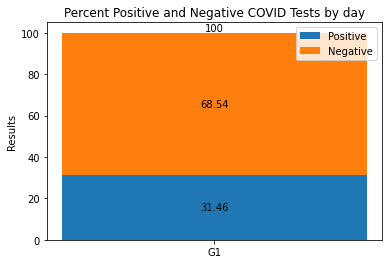

In [50]:
fig, ax = plt.subplots()

p1 = ax.bar(ind, percentPositive, width, label='Positive')
p2 = ax.bar(ind, percentNegative, width,
            bottom=percentPositive, label='Negative')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('Results')
ax.set_title('Percent Positive and Negative COVID Tests by day')
ax.set_xticks(ind, labels=['G1'])
ax.legend()

ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')
ax.bar_label(p2)

plt.show()